# Processing the data from https://github.com/capyvara/brazil-civil-registry-data

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import seaborn as sns
sns.set()

In [332]:
cities = ['Manaus', 'Belo Horizonte', 'Curitiba', 'Porto Alegre']
raw_registry_data_path = 'C:/Users/iwona/Desktop/brazil-civil-registry-data/'
project_data_path = '../data/'
save_data_path = '../data/'

### Registry deaths per month

In [333]:
registry_deaths = pd.read_csv(raw_registry_data_path + 'civil_registry_deaths.csv')
# cities = registry_deaths['city'].unique()
registry_deaths = registry_deaths[registry_deaths['city'].isin(cities)]
registry_deaths.start_date = pd.to_datetime(registry_deaths.start_date)
registry_deaths.end_date = pd.to_datetime(registry_deaths.end_date)

print(registry_deaths['city'].unique())
registry_deaths.head()

['Manaus' 'Belo Horizonte' 'Curitiba' 'Porto Alegre']


,start_date,end_date,state,state_ibge_code,city,city_ibge_code,deaths_total,created_at
7298,2015-01-01,2015-01-31,AM,13,Manaus,1302603.0,403,2021-04-20 09:28
7299,2015-02-01,2015-02-28,AM,13,Manaus,1302603.0,404,2021-04-20 09:35
7300,2015-03-01,2015-03-31,AM,13,Manaus,1302603.0,168,2021-04-20 09:28
7301,2015-04-01,2015-04-30,AM,13,Manaus,1302603.0,143,2021-04-20 09:35
7302,2015-05-01,2015-05-31,AM,13,Manaus,1302603.0,456,2021-04-20 09:28


In [334]:
len(cities)

4

<Figure size 720x360 with 0 Axes>

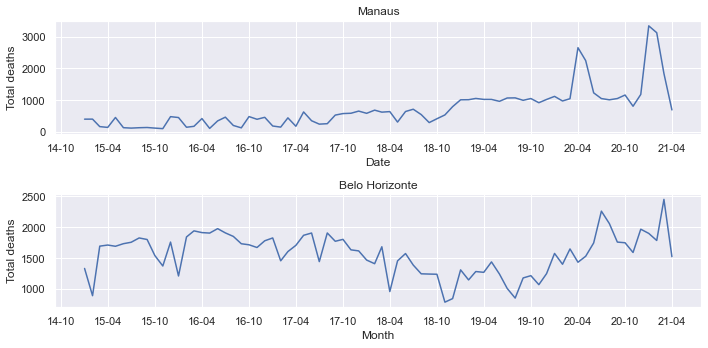

In [194]:
plt.figure(figsize=(10,5))
fig, (ax1,ax2) = plt.subplots(2,figsize=(10,5))

tmp = registry_deaths[registry_deaths['city'] == 'Manaus']
tmp.reset_index(inplace=True)
ax1.plot(tmp.start_date, tmp.deaths_total)
ax1.xaxis_date()
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax1.xaxis.set_major_formatter(DateFormatter("%y-%m"))
ax1.set_xlabel('Date')
ax1.set_ylabel('Total deaths')
ax1.set_title('Manaus')

tmp = registry_deaths[registry_deaths['city'] == 'Belo Horizonte']
tmp.reset_index(inplace=True)
ax2.plot(tmp.start_date, tmp.deaths_total)
ax2.xaxis_date()
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax2.xaxis.set_major_formatter(DateFormatter("%y-%m"))

ax2.set_xlabel('Month')
ax2.set_ylabel('Total deaths')
ax2.set_title('Belo Horizonte')

plt.tight_layout()

plt.show()

In [335]:
registry_deaths.drop(columns = ['state_ibge_code', 'city_ibge_code', 'created_at'], inplace=True)
registry_deaths.reset_index(drop=True, inplace=True)

In [336]:
registry_deaths

,start_date,end_date,state,city,deaths_total
0,2015-01-01,2015-01-31,AM,Manaus,403
1,2015-02-01,2015-02-28,AM,Manaus,404
2,2015-03-01,2015-03-31,AM,Manaus,168
3,2015-04-01,2015-04-30,AM,Manaus,143
4,2015-05-01,2015-05-31,AM,Manaus,456
...,...,...,...,...,...
299,2020-12-01,2020-12-31,RS,Porto Alegre,1886
300,2021-01-01,2021-01-31,RS,Porto Alegre,1888
301,2021-02-01,2021-02-28,RS,Porto Alegre,1802
302,2021-03-01,2021-03-31,RS,Porto Alegre,3223


### Covid deaths

In [337]:
covid_deaths = pd.read_csv(raw_registry_data_path + 'civil_registry_covid_cities_detailed.csv')
covid_deaths = covid_deaths[covid_deaths['city'].isin(cities)]
covid_deaths.drop(columns = ['state_ibge_code', 'city_ibge_code', 'created_at'], inplace=True)
covid_deaths.reset_index(drop=True, inplace=True)
print(covid_deaths['city'].unique())
covid_deaths.head()

['Manaus' 'Belo Horizonte' 'Curitiba' 'Porto Alegre']


,date,state,city,place,gender,age_group,deaths_sars,deaths_pneumonia,deaths_respiratory_failure,deaths_septicemia,deaths_indeterminate,deaths_others,deaths_covid19,deaths_stroke,deaths_stroke_covid19,deaths_cardiopathy,deaths_cardiogenic_shock,deaths_heart_attack,deaths_heart_attack_covid19,deaths_sudden_cardiac
0,2019-01-01,AM,Manaus,home,F,40-49,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-01,AM,Manaus,home,F,90-99,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-01,AM,Manaus,home,M,50-59,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-01,AM,Manaus,home,M,60-69,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-01,AM,Manaus,hospital,F,100+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [338]:
covid_deaths.columns

Index(['date', 'state', 'city', 'place', 'gender', 'age_group', 'deaths_sars',
       'deaths_pneumonia', 'deaths_respiratory_failure', 'deaths_septicemia',
       'deaths_indeterminate', 'deaths_others', 'deaths_covid19',
       'deaths_stroke', 'deaths_stroke_covid19', 'deaths_cardiopathy',
       'deaths_cardiogenic_shock', 'deaths_heart_attack',
       'deaths_heart_attack_covid19', 'deaths_sudden_cardiac'],
      dtype='object')

In [339]:
covid_deaths.place.unique()

array(['home', 'hospital', 'public', 'others'], dtype=object)

### Group the deaths to non-covid and covid

In [340]:
columns_non_covid_deaths = ['deaths_sars',
       'deaths_pneumonia', 'deaths_respiratory_failure', 'deaths_septicemia',
       'deaths_indeterminate', 'deaths_others',
       'deaths_stroke', 'deaths_cardiopathy',
       'deaths_cardiogenic_shock', 'deaths_heart_attack', 'deaths_sudden_cardiac']
columns_covid_deaths = ['deaths_covid19', 'deaths_stroke_covid19',
       'deaths_heart_attack_covid19']

In [341]:
def sum_columns(df, columns):
    df.fillna(0, inplace=True)
    vals = df[columns[0]].values
    for c in columns[1:]:
        vals = vals + df[c].values
    return vals

In [342]:
cd = covid_deaths.copy()
cd['deaths_non_covid'] = sum_columns(cd, columns_non_covid_deaths)
cd['deaths_covid'] = sum_columns(cd, columns_covid_deaths)
cd['deaths_total'] = sum_columns(cd, ['deaths_non_covid', 'deaths_covid'])
cd.drop(columns=columns_non_covid_deaths, inplace=True)
cd.drop(columns=columns_covid_deaths, inplace=True)
cd

,date,state,city,place,gender,age_group,deaths_non_covid,deaths_covid,deaths_total
0,2019-01-01,AM,Manaus,home,F,40-49,1.0,0.0,1.0
1,2019-01-01,AM,Manaus,home,F,90-99,1.0,0.0,1.0
2,2019-01-01,AM,Manaus,home,M,50-59,1.0,0.0,1.0
3,2019-01-01,AM,Manaus,home,M,60-69,1.0,0.0,1.0
4,2019-01-01,AM,Manaus,hospital,F,100+,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
66436,2021-04-20,RS,Porto Alegre,hospital,F,90-99,1.0,0.0,1.0
66437,2021-04-20,RS,Porto Alegre,hospital,M,50-59,1.0,1.0,2.0
66438,2021-04-20,RS,Porto Alegre,hospital,M,70-79,1.0,5.0,6.0
66439,2021-04-20,RS,Porto Alegre,hospital,M,80-89,1.0,0.0,1.0


### Group by gender and age

In [343]:
cd_gender = cd.groupby(['date', 'city', 'age_group', 'place'])['deaths_total'].sum()
cd_gender = cd_gender.reset_index()
cd_gender

,date,city,age_group,place,deaths_total
0,2019-01-01,Belo Horizonte,100+,home,1.0
1,2019-01-01,Belo Horizonte,100+,hospital,1.0
2,2019-01-01,Belo Horizonte,20-29,hospital,1.0
3,2019-01-01,Belo Horizonte,40-49,hospital,2.0
4,2019-01-01,Belo Horizonte,50-59,home,1.0
...,...,...,...,...,...
46533,2021-04-20,Porto Alegre,70-79,hospital,7.0
46534,2021-04-20,Porto Alegre,80-89,home,1.0
46535,2021-04-20,Porto Alegre,80-89,hospital,4.0
46536,2021-04-20,Porto Alegre,9-,hospital,1.0


In [344]:
cd_gender_age = cd_gender.groupby(['date', 'city', 'place'])['deaths_total'].sum()
cd_gender_age = cd_gender_age.reset_index()
cd_gender_age

,date,city,place,deaths_total
0,2019-01-01,Belo Horizonte,home,10.0
1,2019-01-01,Belo Horizonte,hospital,31.0
2,2019-01-01,Belo Horizonte,others,2.0
3,2019-01-01,Belo Horizonte,public,1.0
4,2019-01-01,Curitiba,home,3.0
...,...,...,...,...
10213,2021-04-20,Belo Horizonte,home,5.0
10214,2021-04-20,Belo Horizonte,hospital,14.0
10215,2021-04-20,Manaus,hospital,1.0
10216,2021-04-20,Porto Alegre,home,2.0


In [345]:
cd_gender_age[cd_gender_age['city'] == 'Manaus']

,date,city,place,deaths_total
8,2019-01-01,Manaus,home,4.0
9,2019-01-01,Manaus,hospital,23.0
10,2019-01-01,Manaus,public,1.0
20,2019-01-02,Manaus,home,8.0
21,2019-01-02,Manaus,hospital,23.0
...,...,...,...,...
10189,2021-04-17,Manaus,hospital,9.0
10199,2021-04-18,Manaus,home,2.0
10200,2021-04-18,Manaus,hospital,6.0
10209,2021-04-19,Manaus,hospital,4.0


In [349]:
cd_gender_age_ooh = cd_gender_age.copy()
cd_gender_age_ooh.replace('public', 'ooh', inplace=True)
cd_gender_age_ooh.replace('home', 'ooh', inplace=True)
cd_gender_age_ooh.replace('others', 'ooh', inplace=True)
cd_gender_age_ooh = cd_gender_age_ooh.groupby(['date', 'city', 'place', 'date_month'])['deaths_total'].sum()
cd_gender_age_ooh = cd_gender_age_ooh.reset_index()
cd_gender_age_ooh.head()

,date,city,place,date_month,deaths_total
0,2019-01-01,Belo Horizonte,hospital,2019-01,31.0
1,2019-01-01,Belo Horizonte,ooh,2019-01,13.0
2,2019-01-01,Curitiba,hospital,2019-01,34.0
3,2019-01-01,Curitiba,ooh,2019-01,5.0
4,2019-01-01,Manaus,hospital,2019-01,23.0


### Make plots

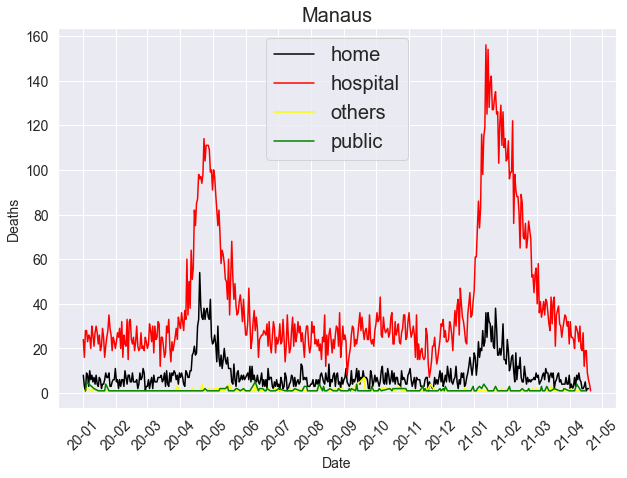

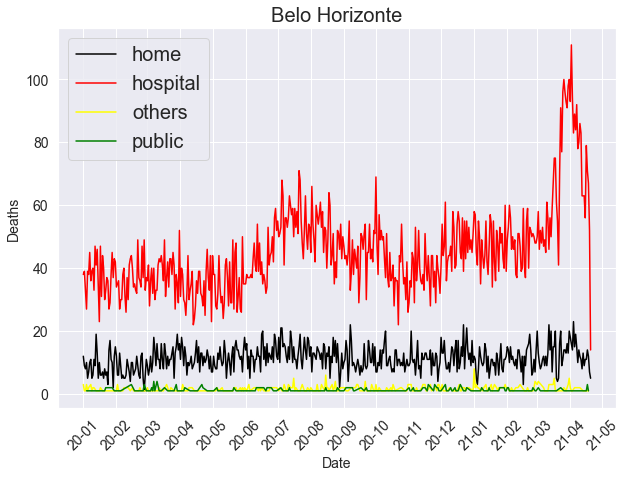

In [169]:
def plot_deaths_by_place(df, city, stack, value_col):
    df = df[df['city'] == city]
    df = df[df['date'] >= '2020-01-01']
    df.date = pd.to_datetime(df.date)

    stacks = list(df[stack].unique())
    fig, ax = plt.subplots(figsize=(10,7))
# plt.figure(figsize=(10,10))
    colors = ['black', 'red', 'yellow', 'green']
    for i in range(len(stacks)):
        s = stacks[i]
        c = colors[i]
        df_tmp = df[df[stack] == s].reset_index()
#         sns.barplot(x='date',  y=value_col, data=df_tmp, color=c, label = s)
        ax.plot(df_tmp['date'],  df_tmp[value_col], color=c, label = s)
    

    ax.xaxis_date()
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(DateFormatter("%y-%m"))
    plt.xticks(rotation=45)
    
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.legend(fontsize=20)
#     plt.ylim([0,60])
    plt.xlabel('Date',fontsize=14)
    plt.ylabel('Deaths',fontsize=14)
    plt.title(city, fontsize=20)
#     plt.show()

plot_deaths_by_place(cd_gender_age, 'Manaus', 'place', 'deaths_total')
plot_deaths_by_place(cd_gender_age, 'Belo Horizonte', 'place', 'deaths_total')

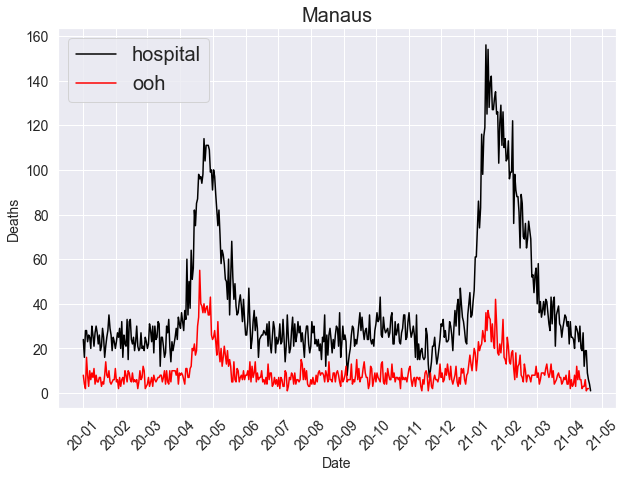

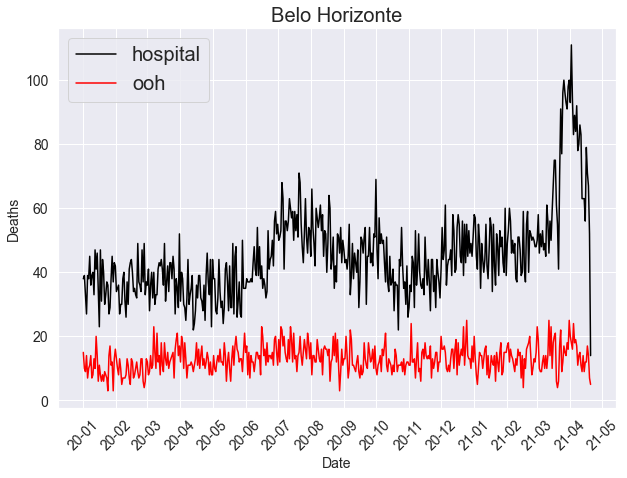

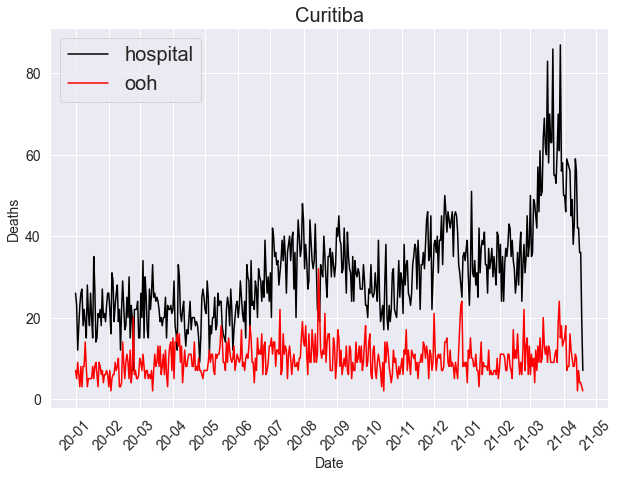

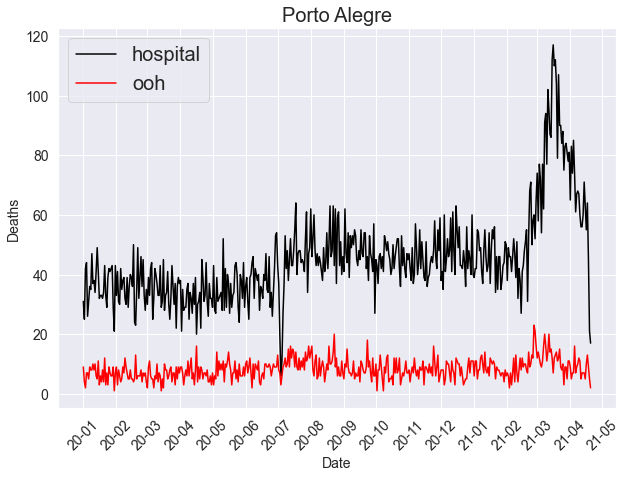

In [354]:
plot_deaths_by_place(cd_gender_age_ooh, 'Manaus', 'place', 'deaths_total')
plot_deaths_by_place(cd_gender_age_ooh, 'Belo Horizonte', 'place', 'deaths_total')
plot_deaths_by_place(cd_gender_age_ooh, 'Curitiba', 'place', 'deaths_total')
plot_deaths_by_place(cd_gender_age_ooh, 'Porto Alegre', 'place', 'deaths_total')

### Compare two datasets total numbers of deaths
#### First we need to bin the covid_deaths dataframe to give us monthly data

In [347]:
registry_deaths['date_month'] = registry_deaths['start_date'].map(lambda x: x.strftime('%Y-%m'))
registry_deaths.head()

,start_date,end_date,state,city,deaths_total,date_month
0,2015-01-01,2015-01-31,AM,Manaus,403,2015-01
1,2015-02-01,2015-02-28,AM,Manaus,404,2015-02
2,2015-03-01,2015-03-31,AM,Manaus,168,2015-03
3,2015-04-01,2015-04-30,AM,Manaus,143,2015-04
4,2015-05-01,2015-05-31,AM,Manaus,456,2015-05


In [348]:
cd_gender_age['date_month'] = cd_gender_age['date'].map(lambda x: str(x)[:-3])
cd_gender_age

,date,city,place,deaths_total,date_month
0,2019-01-01,Belo Horizonte,home,10.0,2019-01
1,2019-01-01,Belo Horizonte,hospital,31.0,2019-01
2,2019-01-01,Belo Horizonte,others,2.0,2019-01
3,2019-01-01,Belo Horizonte,public,1.0,2019-01
4,2019-01-01,Curitiba,home,3.0,2019-01
...,...,...,...,...,...
10213,2021-04-20,Belo Horizonte,home,5.0,2021-04
10214,2021-04-20,Belo Horizonte,hospital,14.0,2021-04
10215,2021-04-20,Manaus,hospital,1.0,2021-04
10216,2021-04-20,Porto Alegre,home,2.0,2021-04


In [350]:
death_monthly = cd_gender_age.groupby(['date_month', 'city'])['deaths_total'].sum()
death_monthly = death_monthly.reset_index()
death_monthly.head()

,date_month,city,deaths_total
0,2019-01,Belo Horizonte,1198.0
1,2019-01,Curitiba,917.0
2,2019-01,Manaus,901.0
3,2019-01,Porto Alegre,1361.0
4,2019-02,Belo Horizonte,1058.0


In [351]:
reg_tmp = registry_deaths[['city', 'deaths_total', 'date_month']]
reg_tmp.head()

,city,deaths_total,date_month
0,Manaus,403,2015-01
1,Manaus,404,2015-02
2,Manaus,168,2015-03
3,Manaus,143,2015-04
4,Manaus,456,2015-05


In [352]:
death_monthly = death_monthly.merge(reg_tmp, on = ['city', 'date_month'])
death_monthly.rename(columns={"deaths_total_x": "death_total_natural",
                              "deaths_total_y": "death_total_all"}, inplace=True)
death_monthly.head()

,date_month,city,death_total_natural,death_total_all
0,2019-01,Belo Horizonte,1198.0,1308
1,2019-01,Curitiba,917.0,962
2,2019-01,Manaus,901.0,1013
3,2019-01,Porto Alegre,1361.0,1631
4,2019-02,Belo Horizonte,1058.0,1145


C:\Users\iwona\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.
C:\Users\iwona\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.
C:\Users\iwona\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.
C:\Users\iwona\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas

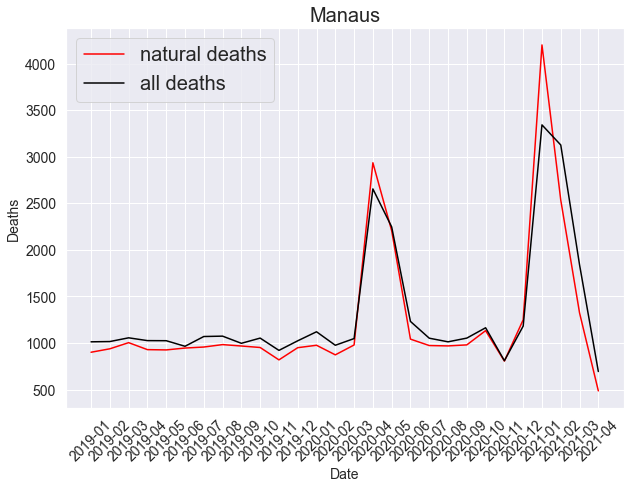

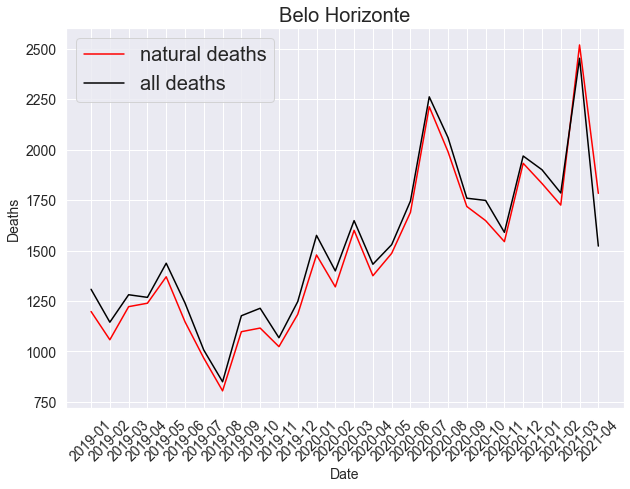

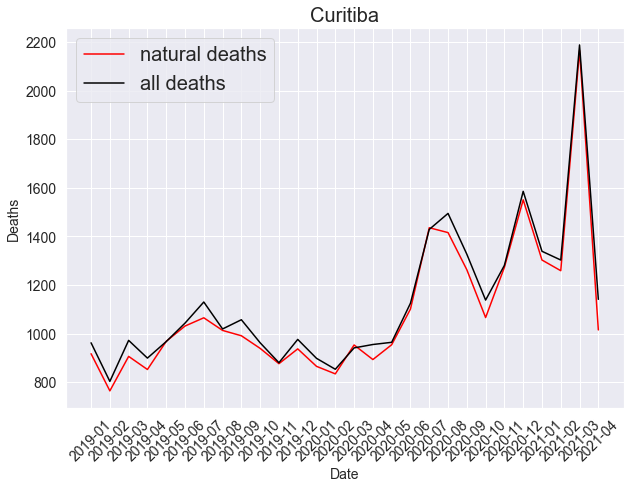

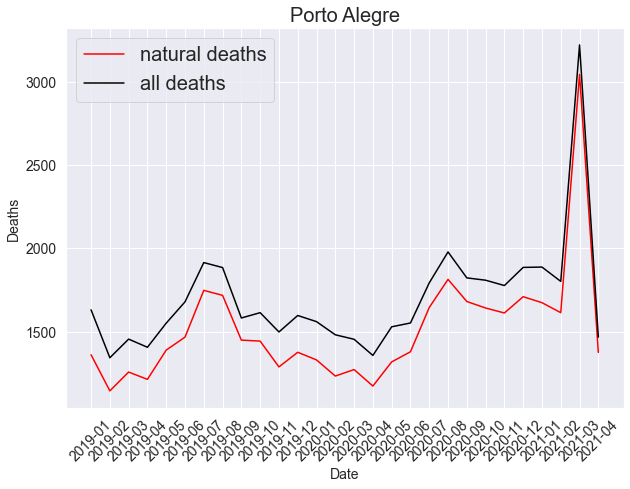

In [353]:
def plot_deaths_monthly(df, city):
    df = df[df['city'] == city]
#     df = df[df['date'] >= '2020-01-01']
    df.date = pd.to_datetime(df.date_month)

    fig, ax = plt.subplots(figsize=(10,7))

    ax.plot(df['date_month'],  df['death_total_natural'], color='red', label = 'natural deaths')
    ax.plot(df['date_month'],  df['death_total_all'], color='black', label = 'all deaths')

#     ax.xaxis_date()
#     ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#     ax.xaxis.set_major_formatter(DateFormatter("%y-%m"))
    plt.xticks(rotation=45)
    
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.legend(fontsize=20)
#     plt.ylim([0,60])
    plt.xlabel('Date',fontsize=14)
    plt.ylabel('Deaths',fontsize=14)
    plt.title(city, fontsize=20)
#     plt.show()

plot_deaths_monthly(death_monthly, 'Manaus')
plot_deaths_monthly(death_monthly, 'Belo Horizonte')
plot_deaths_monthly(death_monthly, 'Curitiba')
plot_deaths_monthly(death_monthly, 'Porto Alegre')

### Comparison of registry data with the burial data for Manaus
Burial data obtained from https://drive.google.com/drive/folders/1DYmuzzOJwHrB3LtXMrmguc1mIauJH4V_

In [355]:
burials = pd.read_csv(project_data_path + 'excess_deaths_manaus_01apr2020_17apr2021_compact.csv')
# remove rows where date is NaN
burials = burials[burials['Covid_dates_2020_2021'].notna()]
# change type of columns with date to timestamp
burials['Covid_dates_2020_2021'] = pd.to_datetime(burials['Covid_dates_2020_2021'])
# drop redundant columns
burials = burials[['Covid_dates_2020_2021', '2020_2021_pub_priv_burials_cremats']]
burials.rename(columns={"Covid_dates_2020_2021": "date",
                              "2020_2021_pub_priv_burials_cremats": "burial_deaths"}, inplace=True)
# filter the dates
burials = burials[burials['date'] >= '2020-04-01'] # first date for which we have the burial data
burials = burials[burials['date'] <= '2021-04-21']

burials.reset_index(drop=True, inplace=True)
burials

,date,burial_deaths
0,2020-04-01,32.0
1,2020-04-02,43.0
2,2020-04-03,33.0
3,2020-04-04,42.0
4,2020-04-05,40.0
...,...,...
381,2021-04-17,33.0
382,2021-04-18,NaN
383,2021-04-19,NaN
384,2021-04-20,NaN


In [356]:
cd_gender_age_ooh_Manaus = cd_gender_age_ooh[cd_gender_age_ooh['city'] == 'Manaus']
cd_gender_age_ooh_Manaus.reset_index(drop=True, inplace=True)
cd_gender_age_ooh_Manaus['date'] = pd.to_datetime(cd_gender_age_ooh_Manaus['date'])

cd_gender_age_ooh_Manaus.head()

C:\Users\iwona\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,city,place,date_month,deaths_total
0,2019-01-01,Manaus,hospital,2019-01,23.0
1,2019-01-01,Manaus,ooh,2019-01,5.0
2,2019-01-02,Manaus,hospital,2019-01,23.0
3,2019-01-02,Manaus,ooh,2019-01,8.0
4,2019-01-03,Manaus,hospital,2019-01,26.0


385


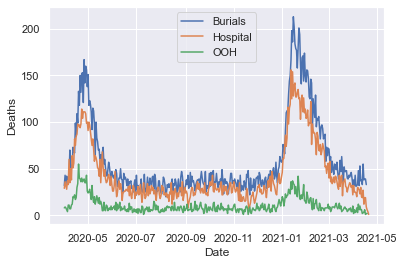

In [357]:
plt.plot(burials.date, burials.burial_deaths, label = 'Burials')

tmp = cd_gender_age_ooh_Manaus[cd_gender_age_ooh_Manaus['place'] == 'hospital']
tmp = tmp[tmp['date'] >= '2020-04-01']

print(len(tmp.index))
plt.plot(tmp.date, tmp.deaths_total, label = 'Hospital')

tmp = cd_gender_age_ooh_Manaus[cd_gender_age_ooh_Manaus['place'] == 'ooh']
tmp = tmp[tmp['date'] >= '2020-04-01']
plt.plot(tmp.date, tmp.deaths_total, label = 'OOH')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.legend()
plt.show()

In [358]:
cd_gender_age_ooh_Manaus

,date,city,place,date_month,deaths_total
0,2019-01-01,Manaus,hospital,2019-01,23.0
1,2019-01-01,Manaus,ooh,2019-01,5.0
2,2019-01-02,Manaus,hospital,2019-01,23.0
3,2019-01-02,Manaus,ooh,2019-01,8.0
4,2019-01-03,Manaus,hospital,2019-01,26.0
...,...,...,...,...,...
1674,2021-04-17,Manaus,ooh,2021-04,2.0
1675,2021-04-18,Manaus,hospital,2021-04,6.0
1676,2021-04-18,Manaus,ooh,2021-04,2.0
1677,2021-04-19,Manaus,hospital,2021-04,4.0


In [359]:
natural_deaths_manaus = cd_gender_age_ooh_Manaus.groupby('date')['deaths_total'].sum()
df_natural_deaths_manaus = pd.DataFrame(columns = ['date', 'natural_deaths'])
df_natural_deaths_manaus['date'] = natural_deaths_manaus.index
df_natural_deaths_manaus['natural_deaths'] = natural_deaths_manaus.values
df_natural_deaths_manaus

,date,natural_deaths
0,2019-01-01,28.0
1,2019-01-02,31.0
2,2019-01-03,32.0
3,2019-01-04,31.0
4,2019-01-05,25.0
...,...,...
836,2021-04-16,20.0
837,2021-04-17,11.0
838,2021-04-18,8.0
839,2021-04-19,4.0


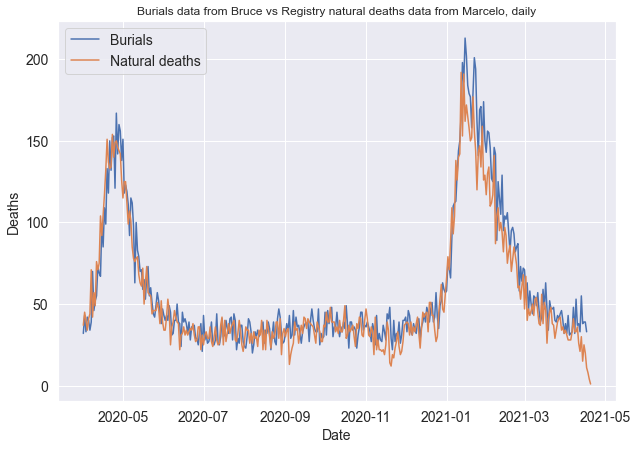

In [360]:
plt.figure(figsize=(10,7))

plt.plot(burials.date, burials.burial_deaths, label = 'Burials')
tmp = df_natural_deaths_manaus[df_natural_deaths_manaus['date'] >= '2020-04-01']
plt.plot(tmp.date, tmp.natural_deaths, label = 'Natural deaths')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Deaths',fontsize=14)
plt.legend(fontsize=14)
plt.title('Burials data from Bruce vs Registry natural deaths data from Marcelo, daily')
plt.show()

C:\Users\iwona\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


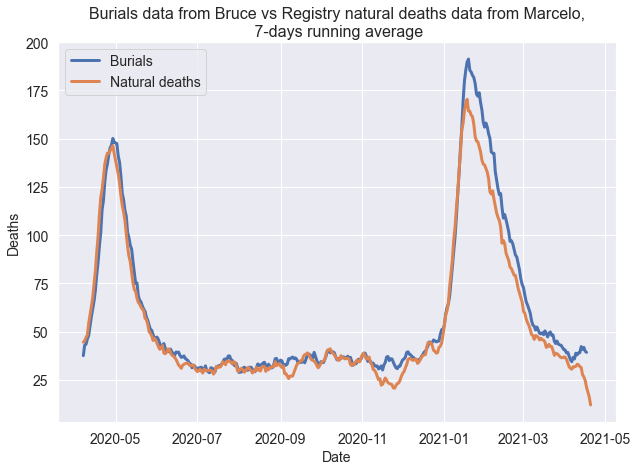

In [361]:
plt.figure(figsize=(10,7))

tmp = burials.copy()
tmp['burial_deaths_7'] = tmp.loc[:,'burial_deaths'].rolling(window=7).mean()
plt.plot(tmp.date, tmp.burial_deaths_7, label = 'Burials', lw=3)

tmp = df_natural_deaths_manaus[df_natural_deaths_manaus['date'] >= '2020-04-01']
tmp['natural_deaths_7'] = tmp.loc[:,'natural_deaths'].rolling(window=7).mean()
plt.plot(tmp.date, tmp.natural_deaths_7, label = 'Natural deaths', lw=3)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Deaths',fontsize=14)
plt.legend(fontsize=14)
plt.title('Burials data from Bruce vs Registry natural deaths data from Marcelo,\n 7-days running average',
         fontsize=16)
plt.show()

### Save dataframes to csv

In [362]:
# cd.to_csv(save_data_path + 'registry_covid_detailed.csv', index=False)

In [363]:
# registry_deaths.to_csv(save_data_path + 'registry_monthly.csv', index=False)

In [364]:
registry_deaths

,start_date,end_date,state,city,deaths_total,date_month
0,2015-01-01,2015-01-31,AM,Manaus,403,2015-01
1,2015-02-01,2015-02-28,AM,Manaus,404,2015-02
2,2015-03-01,2015-03-31,AM,Manaus,168,2015-03
3,2015-04-01,2015-04-30,AM,Manaus,143,2015-04
4,2015-05-01,2015-05-31,AM,Manaus,456,2015-05
...,...,...,...,...,...,...
299,2020-12-01,2020-12-31,RS,Porto Alegre,1886,2020-12
300,2021-01-01,2021-01-31,RS,Porto Alegre,1888,2021-01
301,2021-02-01,2021-02-28,RS,Porto Alegre,1802,2021-02
302,2021-03-01,2021-03-31,RS,Porto Alegre,3223,2021-03
